In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [3]:
coffe_data = pd.read_csv('data/merged_data_cleaned.csv', index_col=0)

pd.set_option('display.max_columns', None) # Add this line to display all columns since bag_weight was hidden

coffe_data

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,

### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

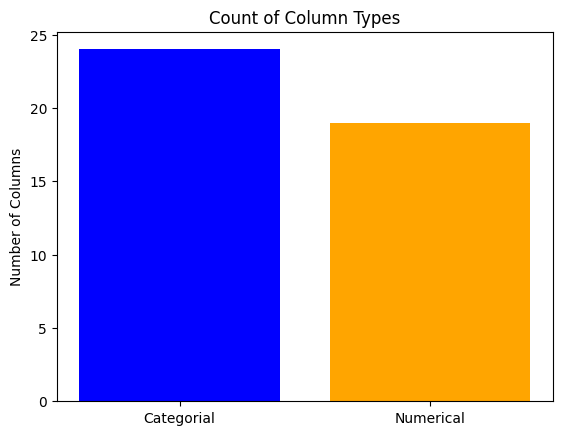

In [4]:
categorial_cols = coffe_data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = coffe_data.select_dtypes(include=['number']).columns.tolist()

counts = {'Categorial': len(categorial_cols), 'Numerical': len(numerical_cols)}

plt.bar(counts.keys(), counts.values(), color=['blue', 'orange'])
plt.title('Count of Column Types')
plt.ylabel('Number of Columns')
plt.show()

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [5]:
coffe_data.columns = coffe_data.columns.str.lower().str.replace('.', '_')
coffe_data

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [6]:
# Okay, this is weird because some bag_weight have no units of measure, meaning we dont know if the unit is kg or lbs. This means just adding a unit to the ones missing it will have a bias.
# We also have rows where both units are present, which is also a problem.
coffe_data[~(coffe_data.bag_weight.str.contains('kg')) & ~coffe_data.bag_weight.str.contains('lbs')]

# So.. we have 1263 rows where bag_weight is unspecified. To avoid having a bias, we will drop these rows.
coffe_data = coffe_data[((coffe_data.bag_weight.str.contains('kg')) | coffe_data.bag_weight.str.contains('lbs')) & ~coffe_data.bag_weight.str.contains(',')]
coffe_data[~(coffe_data.bag_weight.str.contains('kg')) & ~coffe_data.bag_weight.str.contains('lbs')] # Just checking if we cleared all the biased rows - Success!

# Now... lets convert the lbs to kg, since we are not uneducated americans.
split_cols = coffe_data.bag_weight.str.split(' ', expand=True)

lbs_rows = split_cols[1] == 'lbs'

coffe_data.loc[lbs_rows, 'bag_weight'] = (split_cols.loc[lbs_rows, 0].astype(float) * 0.45359237).round(2).astype(str) + ' kg'

# And now all rows have the same unit, while the ones which we were unsure about are deleted so we can't have a bias.
coffe_data

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,30 kg,Specialty Coffee Institute of Asia,2013,"September 3rd, 2013",Ji-Ae Ahn,NaN,Natural / Dry,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.00,10.00,8.33,88.83,0.11,0,0.0,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global oppo

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [7]:
# Okay so first we check if we have any NaN values for harvest_year, if we do, we delete them.
coffe_data = coffe_data[coffe_data.harvest_year.notna()]

# Then we check what kind of values we have so we know what to do next.
coffe_data[coffe_data.harvest_year.str.len() > 4]

# We see that we have different formats like Month Year, Year and Year/Year. We will convert all of them to just Year.
coffe_data.harvest_year = coffe_data.harvest_year.apply(
    lambda x: x.split(' ')[-1] if ' ' in x else x
)
# Now that we cleared the rows with a month before, we need to to a pivot on the column because we have some rows with two years, like 2019/2020.
# I also realized that we have different kinds of seperators like '/' and '-'. So we need to pivot twice, and the remove the rest of the rows as they have random string values like a name
# of a person, a place or a random string.
coffe_data.harvest_year = coffe_data.harvest_year.astype(str).str.split('/')
coffe_data = coffe_data.explode('harvest_year')

coffe_data.harvest_year = coffe_data.harvest_year.astype(str).str.split('-')
coffe_data = coffe_data.explode('harvest_year')

coffe_data = coffe_data[coffe_data.harvest_year.str.len() <= 4]
coffe_data[coffe_data.harvest_year.str.len() > 4] # Just checking if we cleared all the biased rows - Success!

# Now, let's fix the grading_date and expiration.
coffe_data.grading_date = pd.to_datetime(coffe_data.grading_date, format='mixed')
coffe_data.expiration = pd.to_datetime(coffe_data.expiration, format='mixed')
coffe_data


C:\Users\vladi\AppData\Local\Temp\ipykernel_26448\2746930469.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffe_data.harvest_year = coffe_data.harvest_year.apply(
C:\Users\vladi\AppData\Local\Temp\ipykernel_26448\2746930469.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffe_data.harvest_year = coffe_data.harvest_year.astype(str).str.split('/')


,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,2015-04-04,metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,2015-04-04,metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,2015-03-26,Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,2016-03-25,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,2015-04-04,metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,30 kg,Specialty Coffee Institute of Asia,2013,2013-09-03,Ji-Ae Ahn,NaN,Natural / Dry,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.00,10.00,8.33,88.83,0.11,0,0.0,Bluish-Green,1,2014-09-03,Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,2016-01-19,Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,2017-01-18,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,2016-01-19,Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,2017-01-18,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,"kwanza norte province, angola",Cafe Cazengo,1,1 kg,Specialty Coffee Association,2014,2014-12-23

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [8]:
coffe_data[coffe_data.country_of_origin.str.contains('unknown')]
# There seems to be none... maybe I filtered them out before?
# If there were any, I would probably drop them, since they are not useful for analysis.

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters


### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [9]:
# Seems like the Owner_1 is the same as Owner but using Pascal Case values.
# Also there seems to be differences in a couple of rows, but I assume that's because of the chinese letters and how they are interpreted by pandas. Or the rows have NaN values.
coffe_data[coffe_data.owner.str.lower() != coffe_data.owner_1.str.lower()]

# Since I don't know what the dataset will be used for, I will not drop the columns with owner - NaN.
# What I will do tho, is I will replace Owner with Owner_1, and remove the duplicate column with lowercase letters.
coffe_data.owner = coffe_data.owner_1
coffe_data = coffe_data.drop(columns=['owner_1'])

# I will also apply Pascal Case to the columns that do not follow the same format.
coffe_data.owner = coffe_data.owner.astype(str).str.title()
coffe_data

# Is there a link to producer? I don't think so, sometimes the producer is the same as the owner, sometimes it's not, and sometimes it's NaN, which could also mean that it's the owner.
# To avoid any bias I think it's best to leave it as is.

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Metad Plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,2015-04-04,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,Metad Plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,2015-04-04,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,Yidnekachew Dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,2015-03-26,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,2016-03-25,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,Metad Plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,2015-04-04,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,Arabica,Ji-Ae Ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,30 kg,Specialty Coffee Institute of Asia,2013,2013-09-03,NaN,Natural / Dry,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.00,10.00,8.33,88.83,0.11,0,0.0,Bluish-Green,1,2014-09-03,Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,Luis Robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,2016-01-19,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,2017-01-18,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,Luis Robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,2016-01-19,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,2017-01-18,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,James Moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,"kwanza norte province, angola",Cafe Cazengo,1,1 kg,Specialty Coffee Association,2014,2014-12-23,NaN,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,NaN,6,2015

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [10]:
# Creating table coffe_colors_by_country...
coffe_colors_by_country = coffe_data.groupby(['country_of_origin', 'color']).size().reset_index(name='count')
coffe_colors_by_country

# To create the table for continents, we first need to map the countries to continents.
# Let's get all unique countries first.
uniqie_countries = coffe_data.country_of_origin.unique()
uniqie_countries

# Okay, now let's create a mapping object...
country_to_continent = {
    'Ethiopia': 'Africa',
    'Brazil': 'South America',
    'Peru': 'South America',
    'United States': 'North America',
    'China': 'Asia',
    'Costa Rica': 'North America',
    'Mexico': 'North America',
    'Uganda': 'Africa',
    'Honduras': 'North America',
    'Taiwan': 'Asia',
    'Tanzania, United Republic Of': 'Africa',
    'Kenya': 'Africa',
    'United States (Hawaii)': 'North America',
    'Thailand': 'Asia',
    'Colombia': 'South America',
    'Guatemala': 'North America',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'El Salvador': 'North America',
    'Indonesia': 'Asia',
    'Nicaragua': 'North America',
    'Ecuador': 'South America',
    'United States (Puerto Rico)': 'North America',
    'Haiti': 'North America',
    'Burundi': 'Africa',
    'Vietnam': 'Asia',
    'Philippines': 'Asia',
    'Rwanda': 'Africa',
    'Malawi': 'Africa',
    'Laos': 'Asia',
    'Zambia': 'Africa',
    'Myanmar': 'Asia',
    'Mauritius': 'Africa',
    'Cote d?Ivoire': 'Africa',
    'India': 'Asia'
}

# Now we create a new column and map the data
coffe_data['contitent_of_origin'] = coffe_data['country_of_origin'].map(country_to_continent)
coffe_data

# And now let's create the table for continents.
coffe_colors_by_continent = coffe_data.groupby(['contitent_of_origin', 'color']).size().reset_index(name='count')
coffe_colors_by_continent

,contitent_of_origin,color,count
0,Africa,Blue-Green,5
1,Africa,Bluish-Green,22
2,Africa,Green,104
3,Asia,Blue-Green,25
4,Asia,Bluish-Green,20
5,Asia,Green,126
6,North America,Blue-Green,31
7,North America,Bluish-Green,48
8,North America,Green,447
9,Oceania,Bluish-Green,1


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

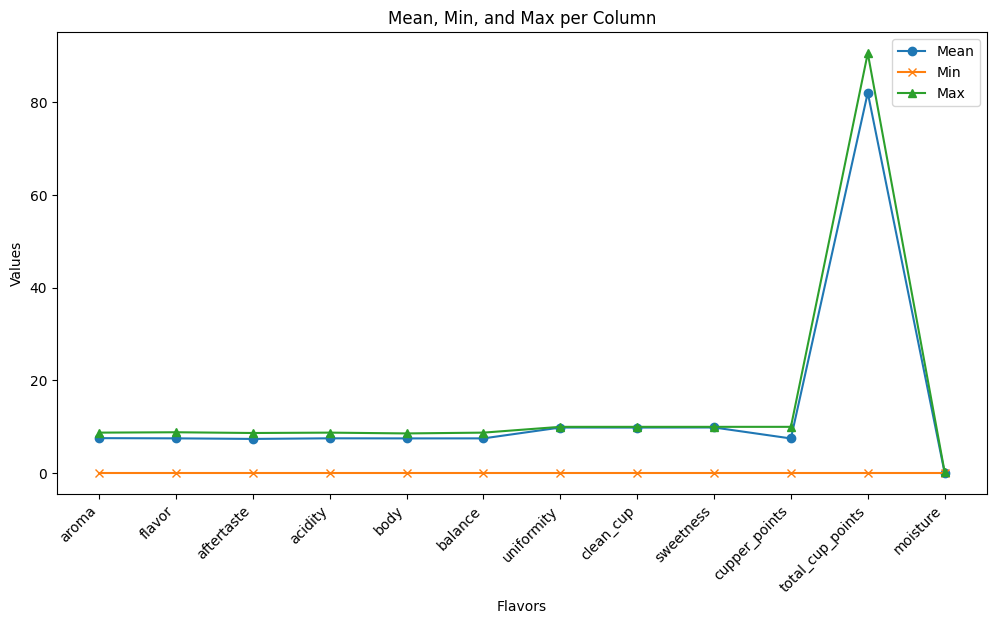

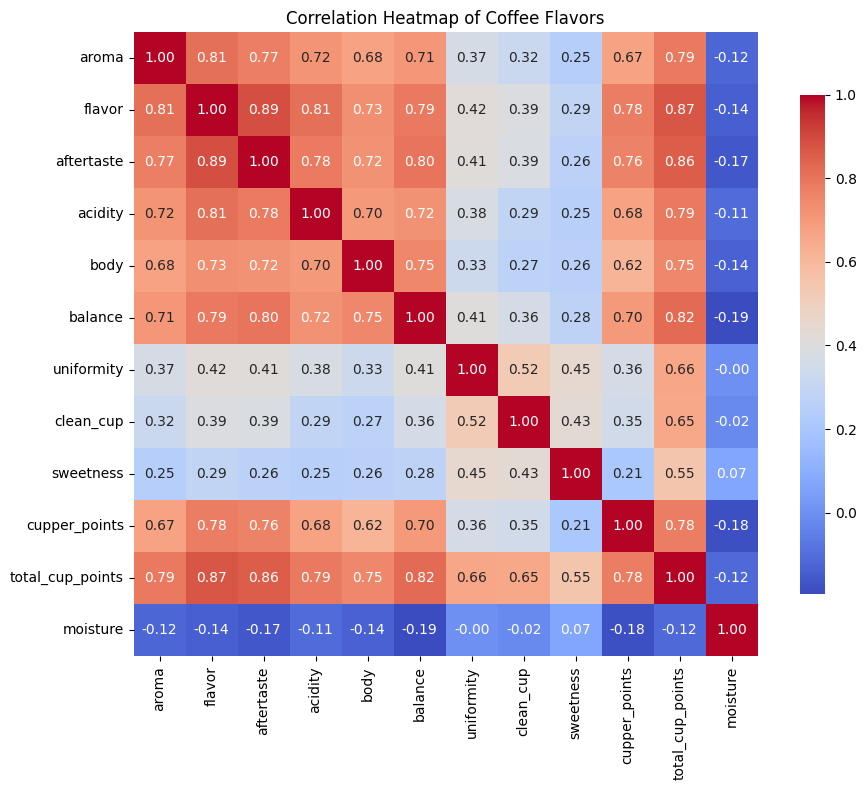

In [11]:
# Let's first create a DataFrame with the flavors data.
flavors_data = coffe_data[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points', 'moisture']]

# Show means and min/max values for the flavors data.
plt.figure(figsize=(12,6))
plt.plot(flavors_data.mean(), label='Mean', marker='o')
plt.plot(flavors_data.min(), label='Min', marker='x')
plt.plot(flavors_data.max(), label='Max', marker='^')
plt.xlabel('Flavors')
plt.ylabel('Values')
plt.legend()
plt.title('Mean, Min, and Max per Column')
plt.xticks(rotation=45, ha='right')

# Heatmapping correlation values of the flavors data.
correlation_values = flavors_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_values, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Coffee Flavors')

# Display all figures
plt.tight_layout()
plt.show()

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

In [ ]:
filtered_coffe_data = coffe_data[['country_of_origin', 'region', 'altitude', 'altitude_high_meters', 'altitude_low_meters', 'altitude_mean_meters', 'company']]
filtered_coffe_data[20: 50]

# We see that Mexico, Taiwan, Tanzania, Guatemalia and other countries have an unusually high number of unique regions. 
# This might be valid but it's worth checking for spelling inconsistencies.
country_region_check = filtered_coffe_data.groupby("country_of_origin")["region"].unique().reset_index()
country_region_check.columns = ["country", "unique_regions"]
country_region_check["number_of_regions"] = country_region_check.unique_regions.apply(len)
country_region_check.sort_values(by="number_of_regions", ascending=False)

# Let's list all regions against each country to try and spot human errors.
country_region_pairs = filtered_coffe_data[['country_of_origin', 'region']].dropna().drop_duplicates()
country_region_pairs.sort_values(by=['country_of_origin', 'region']).head(50)

# We have a bunch of discrepancies for the Countries and Regions.
# Colombia:
# "52 narino (exact location: mattituy; municipality: buesaco)" – too verbose and contains coordinates and parentheses.
# "south huila" and "huila supremo" — should ideally be grouped under "huila".
# "pasto" and "nariño" both refer to the same larger region, could be standardized.
# We have a value "test"
# And so on....

# Brazil:
# "mmm" – unclear abbreviation, likely a data entry error.
# "minas gerais, br" — should be just "minas gerais".

# Costa Rica:
# "costa rica" listed as both country and region – redundant, likely misentered.
# "central valley", "west valley" vs "western valley" — potentially the same thing under inconsistent names.

# "nan" and blank regions appear throughout the dataset — not an error per se, but should be handled consistently in analysis.

# Check rows where Altitude is not null but the cleaned mean is null (i.e., possibly failed parsing)
filtered_coffe_data[(filtered_coffe_data.altitude.notna()) & (filtered_coffe_data.altitude.isna())][["altitude"]].drop_duplicates()
# This shows that there are some rows where the altitude is an invalid or random value, like "test" or "nan".
filtered_coffe_data[filtered_coffe_data.altitude.str.contains('ft') | filtered_coffe_data.altitude.str.contains('m')]
# We also see that the altitudes are inconsistent too, some are in different units, some have a higher altitude than the max, some have a lower altitude than the min.

# We can go on an on, about showing discrepancies, as we can see this dataset is far from clean. We can continue cleaning it, but it will take a lot of time and effort.

,country_of_origin,region,altitude,altitude_high_meters,altitude_low_meters,altitude_mean_meters,company
11,United States,antioquia,meters above sea level: 1.872,1872.0,1872.0,1872.0,coffee quality institute
12,United States,antioquia,meters above sea level: 1.943,1943.0,1943.0,1943.0,coffee quality institute
15,United States,antioquia,meters above sea level: 2.080,2080.0,2080.0,2080.0,coffee quality institute
19,Ethiopia,gedio,1700-2000m,2000.0,1700.0,1850.0,essence coffee
20,United States,antioquia,meters above sea level: 2.019,2019.0,2019.0,2019.0,coffee quality institute
...,...,...,...,...,...,...,...
1326,India,chikmagalur,1000m,1000.0,1000.0,1000.0,sethuraman estate
1327,India,chikmagalur,750m,750.0,750.0,750.0,"cafemakers, llc"
1331,India,chikmagalur,750m,750.0,750.0,750.0,cafemakers
1332,India,chikmagalur,750m,750.0,750.0,750.0,"cafemakers, llc"


### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!